<a href="https://colab.research.google.com/github/Annoyshah/test-1/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
!pip install tensorflow
from tensorflow import keras
import tensorflow as tf
import keras.utils as utils

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D

In [ ]:
!unzip /archive.zip

Archive:  /archive.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/anger/S029_001_00000018.png

In [ ]:
 data_path = '/content/CK+48'

In [ ]:
data_dir_list = os.listdir(data_path)
#data_dir_list
print(str(len(data_dir_list))+' classes are',data_dir_list)

7 classes are ['happy', 'surprise', 'anger', 'contempt', 'fear', 'sadness', 'disgust']


In [ ]:
img_data = []
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)

        img = cv2.resize(img,(48,48))

        img_data.append(img)

number of images in happy =  207
number of images in surprise =  249
number of images in anger =  135
number of images in contempt =  54
number of images in fear =  75
number of images in sadness =  84
number of images in disgust =  177


In [ ]:
img_data = np.array(img_data)
img_data[0].shape

(48, 48, 3)

In [ ]:
img_data.shape

(981, 48, 48, 3)

In [ ]:
print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

shape of image (48, 48)
num of images  981


In [ ]:
label_text = {0:'anger', 1:'contempt', 2: 'contempt',
                         3:'fear', 4:'happiness',
                         5: 'sadness', 6: 'surprise'}

In [ ]:
labels = np.ones((img_data.shape[0],),dtype='int64')

In [ ]:
labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177

labels[366:440]=3 #75
labels[441:647]=4 #207

labels[648:731]=5 #84
labels[732:980]=6 #249

In [ ]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
#     axes = axes.flatten()
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()

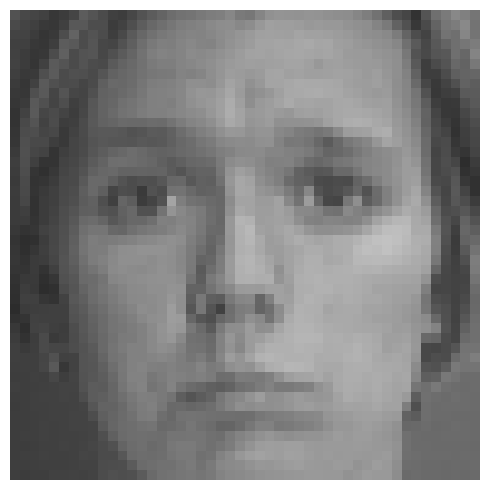

happiness


In [ ]:
plotImages(img_data[600])
print(label_text[labels[600]])

In [ ]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)

    return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2,
                        zoom_range=0.2, horizontal_flip=True,
                        fill_mode='nearrest')

In [ ]:
from keras.optimizers import *

In [ ]:

import numpy as np

# Set a random seed for reproducibility
random_seed = 3
np.random.seed(random_seed)

# Shuffle the data using NumPy's random functions
indices = np.arange(img_data.shape[0])
np.random.shuffle(indices)

x = img_data[indices]
y = labels[indices]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [ ]:
Y = utils.to_categorical(labels, len(dataset))
print(len(Y))
Y

981


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(img_data)

981

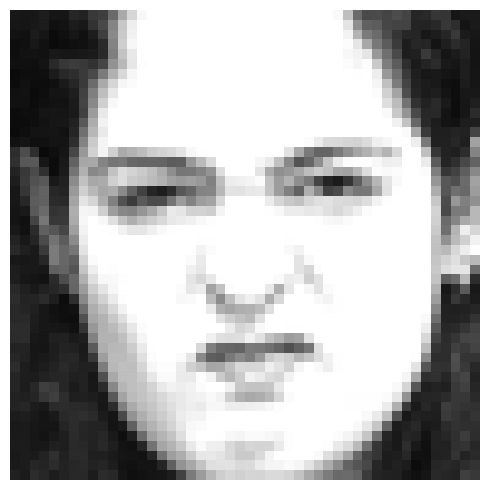

6


In [ ]:
plotImages(x[0])
print(y[0])

In [ ]:
aug.fit(X_train)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        9

In [ ]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(0.001),
]


model = create_model(optims[1])

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=7)  # Assuming you have 7 classes


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Define and compile the model outside of any decorated functions
# model = create_model(optims[1])
# model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

# @tf.function
# def custom_train_step(x_train, y_train):
#     with tf.GradientTape() as tape:
#         predictions = model(x_train, training=True)  # Make predictions using the model
#         loss = categorical_crossentropy(y_train, predictions)  # Calculate the loss

#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))

#     return loss

# for epoch in range(epochs):
#     for batch in range(len(X_train) // batch_size):
#         x_batch = X_train[batch * batch_size:(batch + 1) * batch_size]
#         y_batch = y_train_encoded[batch * batch_size:(batch + 1) * batch_size]

#         loss = custom_train_step(x_batch, y_batch)
        # Optionally, you can log the loss or other metrics here

# Continue with evaluation, testing, or other tasks after training


# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import categorical_crossentropy
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# # Define and compile the model outside of any decorated functions
# model = create_model(optims[1])
# model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

# # Define a callback to save model checkpoints during training
# checkpoint_callback = ModelCheckpoint("model_checkpoint.h5", save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# # Define a callback to log training history to a CSV file
# csv_logger = CSVLogger("training_history.csv", separator=",", append=True)

# # Define a custom train step
# @tf.function
# def custom_train_step(x_train, y_train):
#     with tf.GradientTape() as tape:
#         predictions = model(x_train, training=True)  # Make predictions using the model
#         loss = categorical_crossentropy(y_train, predictions)  # Calculate the loss

#     gradients = tape.gradient(loss, model.trainable_variables)
#     optimizer.apply_gradients(zip(gradients, model.trainable_variables))

#     return loss

# Train the model with the defined callbacks
model.fit(x=X_train, y=y_train_encoded, validation_split=0.1, batch_size=32,
          epochs=100, shuffle=True, verbose=2,
          callbacks=[checkpoint_callback, csv_logger])






Epoch 1/100

Epoch 1: val_accuracy did not improve from 0.83544
23/23 - 3s - loss: 0.4236 - accuracy: 0.8142 - val_loss: 1.2211 - val_accuracy: 0.7722 - 3s/epoch - 131ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.83544
23/23 - 2s - loss: 0.4044 - accuracy: 0.8156 - val_loss: 1.2481 - val_accuracy: 0.7089 - 2s/epoch - 77ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.83544
23/23 - 2s - loss: 0.4203 - accuracy: 0.8113 - val_loss: 1.2735 - val_accuracy: 0.7342 - 2s/epoch - 80ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.83544
23/23 - 2s - loss: 0.5431 - accuracy: 0.7631 - val_loss: 0.9773 - val_accuracy: 0.7215 - 2s/epoch - 79ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.83544
23/23 - 2s - loss: 0.5542 - accuracy: 0.7617 - val_loss: 1.1821 - val_accuracy: 0.7089 - 2s/epoch - 78ms/step
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.83544
23/23 - 2s - loss: 0.4467 - accuracy: 0.7986 - val_loss: 1.2282 -

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)



In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [ ]:
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

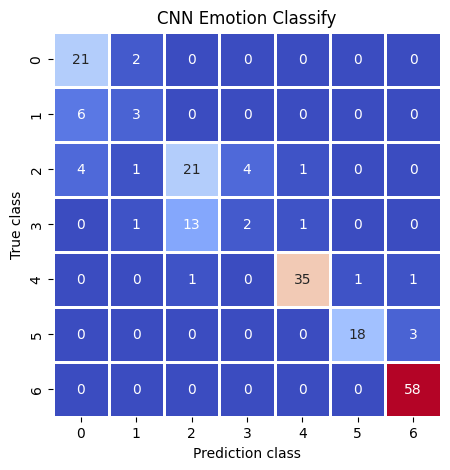

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed your confusion matrix `cm`

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, linewidths=2, fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()


In [ ]:
# from tensorflow.keras.utils import to_categorical

# # Convert y_test to one-hot encoded format
# y_test_encoded = to_categorical(y_test, num_classes=7)
# predicted_class = np.argmax(model.predict(test_image), axis=-1)
# print(predicted_class)

# # Now, you can use y_test_encoded for evaluation
# score = model.evaluate(X_test, y_test_encoded, verbose=0)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])
# test_image = X_test[3:4]
# print (test_image.shape)
# print(model.predict(test_image))

# print(y_test[3:4])

# #predict
# y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
# print(model.predict(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)



Test Loss: 1.7266771793365479
Test accuracy: 0.8020304441452026
(1, 48, 48, 3)
1/1 [==============================] - 0s 96ms/step
[[9.8743641e-01 1.1808613e-02 7.5421290e-04 3.3582432e-09 8.2427917e-08
  8.8432550e-09 6.5268847e-07]]
[0]
7/7 [==============================] - 1s 61ms/step
[[2.5661071e-03 2.2569504e-02 4.0661737e-01 ... 2.8561696e-01
  2.4984586e-01 1.3218394e-03]
 [4.3246284e-01 5.0461949e-03 1.3088384e-04 ... 1.9089777e-02
  5.4207361e-01 1.1929941e-03]
 [7.9777547e-21 1.1471492e-14 2.5146041e-11 ... 9.9999994e-01
  3.9388603e-15 6.1619210e-10]
 ...
 [9.7088119e-21 4.7610478e-13 2.4401481e-16 ... 7.1235838e-12
  3.2010603e-16 1.0000000e+00]
 [1.7881404e-16 8.7957350e-11 4.7290633e-13 ... 2.5095627e-08
  4.0009558e-12 1.0000000e+00]
 [4.7180568e-11 5.2626050e-09 4.8221138e-09 ... 2.1439621e-06
  2.6097240e-07 9.9999762e-01]]


In [ ]:
 from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import multilabel_confusion_matrix

# Convert y_test to binary indicator format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Assuming y_pred contains the predicted labels in binary format (0 or 1)
# Make sure y_pred is in binary format as well
# Then, you can calculate the multilabel confusion matrix
confusion = multilabel_confusion_matrix(y_test_bin, y_pred)
print(confusion)


[[[164  10]
  [  3  20]]

 [[184   4]
  [  6   3]]

 [[153  13]
  [ 10  21]]

 [[176   4]
  [ 15   2]]

 [[157   2]
  [  3  35]]

 [[175   1]
  [  3  18]]

 [[135   4]
  [  0  58]]]


In [ ]:
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))

number of images in happy =  207
number of images in surprise =  249
number of images in anger =  135
number of images in contempt =  54
number of images in fear =  75
number of images in sadness =  84
number of images in disgust =  177


1/1 [==============================] - 0s 34ms/step
anger


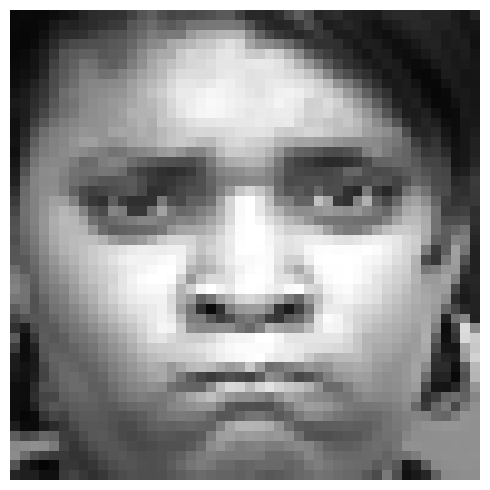

In [ ]:
class_probabilities = model.predict(test_image)

# Find the class with the highest probability
predicted_class = np.argmax(class_probabilities)

# Get the class label from your label_text array
class_label = label_text[predicted_class]

print(class_label)
plotImages(X_test[2])

In [ ]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(1, 48, 48, 3)


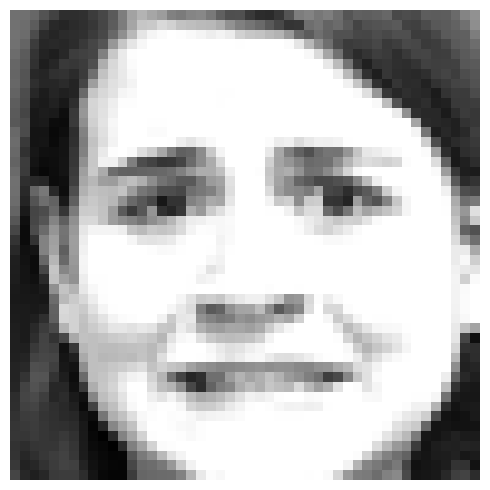

In [ ]:
test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])

In [ ]:
class_probabilities = model.predict(test_image)

# Find the class with the highest probability
predicted_class = np.argmax(class_probabilities)
print(predicted_class)

1/1 [==============================] - 0s 100ms/step
0


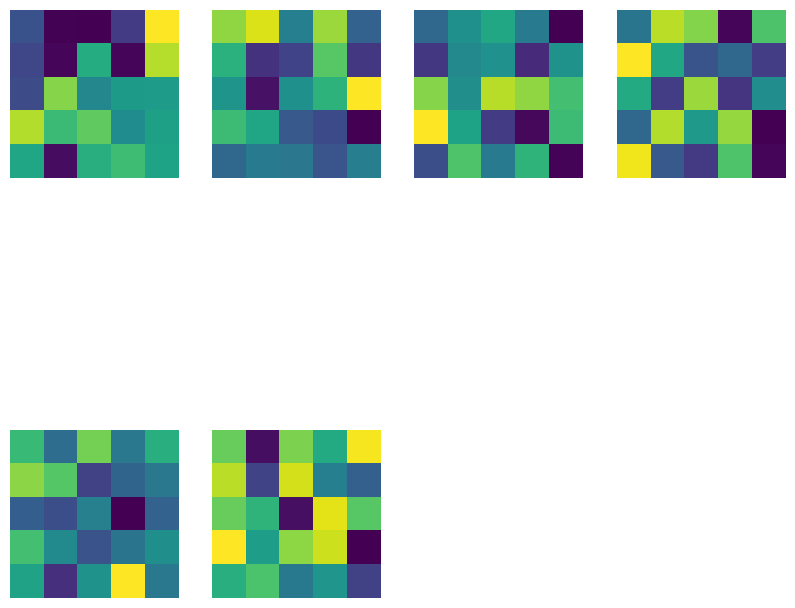

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the convolutional layers from your model
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

# Choose a layer to visualize (e.g., the first convolutional layer)
selected_layer = conv_layers[0]

# Get the weights of the selected layer
weights, biases = selected_layer.get_weights()

# Normalize the weights for visualization
weights = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

# Get the number of filters in the selected layer
num_filters = weights.shape[3]

# Calculate the number of rows for the subplot grid
num_rows = int(np.ceil(num_filters / 4))

# Visualize the filters
plt.figure(figsize=(10, 10))
for i in range(num_filters):
    plt.subplot(num_rows, 4, i+1)
    plt.imshow(weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.show()


In [ ]:
history = model.fit(x=X_train, y=y_train_encoded, validation_split=0.1, batch_size=32,
                    epochs=100, shuffle=True, verbose=2, callbacks=callbacks)


Epoch 1/100
23/23 - 3s - loss: 0.2048 - accuracy: 0.9035 - val_loss: 2.0780 - val_accuracy: 0.7089 - lr: 0.0010 - 3s/epoch - 113ms/step
Epoch 2/100
23/23 - 2s - loss: 0.2173 - accuracy: 0.8993 - val_loss: 2.0210 - val_accuracy: 0.7342 - lr: 0.0010 - 2s/epoch - 71ms/step
Epoch 3/100
23/23 - 2s - loss: 0.2003 - accuracy: 0.9106 - val_loss: 2.2457 - val_accuracy: 0.7595 - lr: 0.0010 - 2s/epoch - 73ms/step
Epoch 4/100
23/23 - 2s - loss: 0.2422 - accuracy: 0.8879 - val_loss: 2.1031 - val_accuracy: 0.7215 - lr: 0.0010 - 2s/epoch - 82ms/step
Epoch 5/100
23/23 - 3s - loss: 0.2189 - accuracy: 0.8965 - val_loss: 2.0623 - val_accuracy: 0.7722 - lr: 0.0010 - 3s/epoch - 127ms/step
Epoch 6/100
23/23 - 2s - loss: 0.2157 - accuracy: 0.8993 - val_loss: 2.2220 - val_accuracy: 0.7595 - lr: 0.0010 - 2s/epoch - 94ms/step
Epoch 7/100
23/23 - 2s - loss: 0.2154 - accuracy: 0.9021 - val_loss: 2.2223 - val_accuracy: 0.7595 - lr: 0.0010 - 2s/epoch - 74ms/step
Epoch 8/100
23/23 - 2s - loss: 0.2249 - accuracy: 0.8

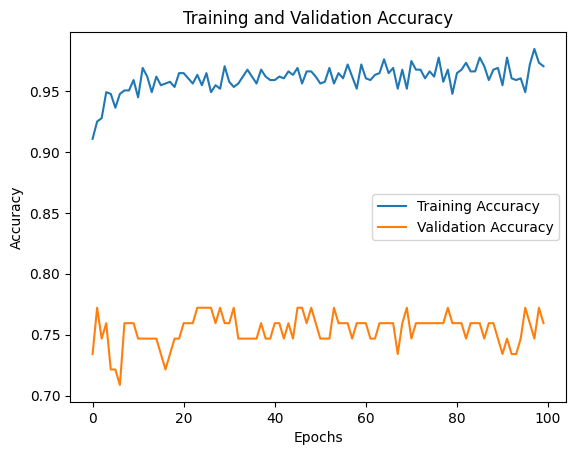

In [ ]:
import matplotlib.pyplot as plt

# Define the number of iterations (epochs) you want to run, e.g., 2000
total_iterations = 100

# Create lists to store accuracy data
training_accuracy = []
validation_accuracy = []

for epoch in range(total_iterations):
    history = model.fit(x=X_train, y=y_train_encoded, validation_split=0.1, batch_size=32,
                        epochs=1, shuffle=True, verbose=0, callbacks=callbacks)

    # Append accuracy data for the current epoch
    training_accuracy.append(history.history['accuracy'][0])
    validation_accuracy.append(history.history['val_accuracy'][0])

# Plot the accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Epoch 1/100
23/23 - 3s - loss: 0.0795 - accuracy: 0.9674 - val_loss: 3.3802 - val_accuracy: 0.7595 - lr: 2.5000e-04 - 3s/epoch - 133ms/step
Epoch 2/100
23/23 - 2s - loss: 0.0862 - accuracy: 0.9660 - val_loss: 3.4706 - val_accuracy: 0.7722 - lr: 2.5000e-04 - 2s/epoch - 106ms/step
Epoch 3/100
23/23 - 2s - loss: 0.0734 - accuracy: 0.9660 - val_loss: 3.5375 - val_accuracy: 0.7342 - lr: 2.5000e-04 - 2s/epoch - 78ms/step
Epoch 4/100
23/23 - 2s - loss: 0.0945 - accuracy: 0.9645 - val_loss: 3.6035 - val_accuracy: 0.7595 - lr: 2.5000e-04 - 2s/epoch - 78ms/step
Epoch 5/100
23/23 - 2s - loss: 0.0744 - accuracy: 0.9702 - val_loss: 3.6559 - val_accuracy: 0.7595 - lr: 2.5000e-04 - 2s/epoch - 77ms/step
Epoch 6/100
23/23 - 2s - loss: 0.0875 - accuracy: 0.9702 - val_loss: 3.6619 - val_accuracy: 0.7595 - lr: 2.5000e-04 - 2s/epoch - 74ms/step
Epoch 7/100
23/23 - 2s - loss: 0.0601 - accuracy: 0.9730 - val_loss: 3.6707 - val_accuracy: 0.7595 - lr: 2.5000e-04 - 2s/epoch - 75ms/step
Epoch 8/100
23/23 - 3s - 

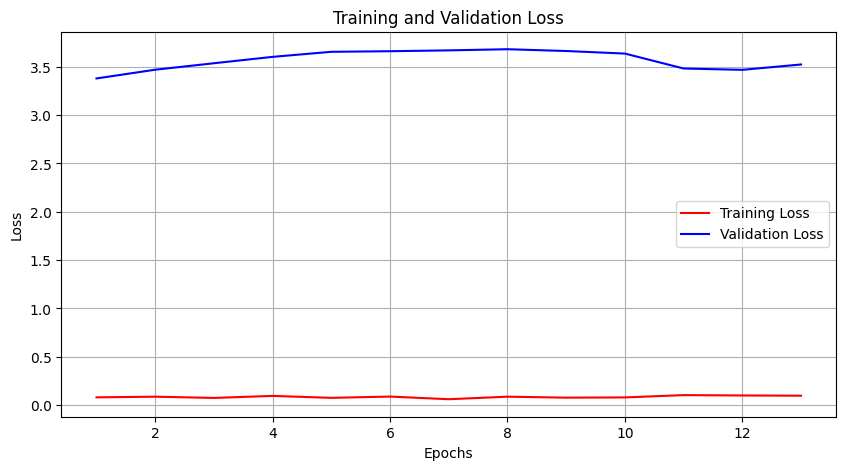

In [ ]:
history = model.fit(x=X_train, y=y_train_encoded, validation_split=0.1, batch_size=32,
          epochs=100, shuffle=True, verbose=2, callbacks=callbacks)


import matplotlib.pyplot as plt

# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'r', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
